<a href="https://colab.research.google.com/github/chamikasudusinghe/nocml/blob/master/fft_r13-unbalaned.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Module Imports for Data Fetiching and Visualization



In [0]:
import time
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

Module Imports for Data Processing

In [0]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.manifold import TSNE

Importing Dataset from GitHub

Train Data

In [34]:
df = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-normal-n-0-3-r13.csv?token=AKVFSOCJTRKAGKOKIHV3HBC6ZQGFW')
print(df.shape)
df

(11223, 30)


,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,1221,2,4,2,1,4,3,9,28,12,27,11,25,4,1,0.25,8,1,1,1,1,1,8,2,8,200,6,27,18,1
1,1260,2,4,2,1,4,3,9,28,12,27,11,26,4,1,0.25,8,1,1,1,1,1,8,2,8,208,6,27,18,1
2,1444,0,3,1,1,4,3,9,3,3,29,13,29,5,5,1.00,24,1,1,1,1,1,0,1,4,116,3,27,9,1
3,1452,2,0,2,1,4,3,9,29,13,27,11,29,3,0,0.00,4,1,1,1,1,1,0,2,8,232,6,27,18,1
4,1488,0,3,1,1,4,3,9,0,0,29,13,30,4,4,1.00,20,1,1,1,1,1,0,1,4,120,3,27,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11218,3268050,2,0,6,4,2,3,10,29,13,27,11,20034,3,0,0.00,25,1,1,1,1,1,0,24,48,961632,18,30,54,1
11219,3268057,2,0,6,5,3,3,10,29,13,27,11,20034,3,0,0.00,32,1,1,1,1,1,0,30,90,1803060,18,30,54,1
11220,3268058,2,0,2,1,4,3,11,29,13,27,11,20035,3,0,0.00,32,1,1,1,1,1,0,2,8,160280,6,33,18,1
11221,3268059,2,0,7,1,4,3,12,29,13,3,3,20034,5,0,0.00,5,1,1,1,1,1,0,7,28,560952,21,36,63,1


In [0]:
df1 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-malicious-n-0-3-m-1-r13.csv?token=AKVFSOHAG2XO6WTVIR2TJSC6ZQGF4',nrows=51000)
df2 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-malicious-n-0-3-m-6-r13.csv?token=AKVFSOG4ZK5G6Q4NMY4Q5C26ZQGGC',nrows=51000)
df3 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-malicious-n-0-3-m-9-r13.csv?token=AKVFSOHMNQMEMKOAPPTZ6M26ZQGGG',nrows=51000)
df4 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-malicious-n-0-3-m-14-r13.csv?token=AKVFSOANRZP7WWJEIBH7K7C6ZQILS',nrows=51000)

df11 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-normal-n-0-5-r13.csv?token=AKVFSOHCPWNRU6CIGNA33Q26ZQIQO')
df12 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-normal-n-0-12-r13.csv?token=AKVFSOE5ETJ7GFUJV4HBX6C6ZQIQW')
df13 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-normal-n-0-15-r13.csv?token=AKVFSOESKPXPNTWWYWRPLX26ZQIQY')

In [36]:
print(df1.shape)
print(df2.shape)
print(df3.shape)
print(df4.shape)
print(df11.shape)
print(df12.shape)
print(df13.shape)

(17382, 30)
(16753, 30)
(17348, 30)
(29509, 30)
(11848, 30)
(33576, 30)
(23965, 30)


In [0]:
df = df.append(df1, ignore_index=True,sort=False)
df = df.append(df2, ignore_index=True,sort=False)
df = df.append(df3, ignore_index=True,sort=False)
df = df.append(df4, ignore_index=True,sort=False)
df = df.append(df11, ignore_index=True,sort=False)
df = df.append(df12, ignore_index=True,sort=False)
df = df.append(df13, ignore_index=True,sort=False)
df = df.sort_values('timestamp')
df.to_csv('fft-r1-train.csv',index=False)

In [38]:
df = pd.read_csv('fft-r1-train.csv')
df

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,11,2,4,1,1,4,3,9,12,12,23,7,2,5,1,0.200000,8,1,1,1,1,1,8,1,4,8,3,27,9,1
1,92,4,2,1,1,4,3,9,15,15,24,8,3,4,2,0.500000,12,1,1,1,1,1,8,1,4,12,3,27,9,1
2,110,4,2,1,1,4,3,9,14,14,24,8,5,3,1,0.333333,8,1,1,1,1,1,8,1,4,20,3,27,9,0
3,224,2,4,1,1,4,3,9,12,12,22,6,6,4,1,0.250000,8,1,1,1,1,1,8,1,4,24,3,27,9,1
4,350,2,4,1,1,4,3,9,12,12,23,7,8,5,1,0.200000,8,1,1,1,1,1,8,1,4,32,3,27,9,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161599,3275037,3,2,5,2,2,3,9,15,15,17,1,20055,5,2,0.400000,19,1,1,1,1,1,6,10,20,401100,15,27,45,1
161600,3275044,3,2,5,3,2,3,9,15,15,17,1,20055,5,2,0.400000,26,1,1,1,1,1,6,15,30,601650,15,27,45,1
161601,3275051,3,2,5,4,2,3,9,15,15,17,1,20055,5,2,0.400000,33,1,1,1,1,1,6,20,40,802200,15,27,45,1
161602,3275058,3,2,5,5,3,3,9,15,15,17,1,20055,5,2,0.400000,40,1,1,1,1,1,6,25,75,1504125,15,27,45,1


In [39]:
df.shape

(161604, 30)

Test Data

In [40]:
df5 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-malicious-n-0-3-m-2-r13.csv?token=AKVFSOAQFNZSDYAZQ4MWJZ26ZQKAW')
df6 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-malicious-n-0-3-m-10-r13.csv?token=AKVFSOHJTUCYKXBAJ3ZN7EK6ZQKBG')
df7 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-malicious-n-0-3-m-12-r13.csv?token=AKVFSODVIOZWY6Q5AEY4CEK6ZQKBK')
df8 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-malicious-n-0-3-m-13-r13.csv?token=AKVFSOHGCK2CCY5C3VODLHK6ZQKBQ')
df9 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-malicious-n-0-3-m-15-r13.csv?token=AKVFSOBTGFBJ4L327DLDYSS6ZQKBU')
df10 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-malicious-n-0-3-m-5-r13.csv?token=AKVFSOGNDDY7HYWANMHVJT26ZQLR6')

df14 = pd.read_csv('https://raw.githubusercontent.com/chamikasudusinghe/nocml/master/dos%20results%20ver%201.1/router-data/r13/2-fft-normal-n-0-10-r13.csv?token=AKVFSOAS3A4UMA5HTNRAC4C6ZQLTI')
df5.shape

(16753, 30)

In [41]:
df5

,timestamp,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,src_ni,src_router,dst_ni,dst_router,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
0,1221,2,4,2,1,4,3,9,28,12,27,11,37,4,1,0.25,8,1,1,1,1,1,8,2,8,296,6,27,18,0
1,1243,2,4,2,1,4,3,9,28,12,27,11,38,4,1,0.25,8,1,1,1,1,1,8,2,8,304,6,27,18,0
2,1284,2,4,2,1,4,3,9,28,12,27,11,39,4,1,0.25,8,1,1,1,1,1,8,2,8,312,6,27,18,0
3,1446,0,3,1,1,4,3,9,3,3,29,13,43,5,5,1.00,24,1,1,1,1,1,0,1,4,172,3,27,9,0
4,1454,2,0,2,1,4,3,9,29,13,27,11,43,3,0,0.00,4,1,1,1,1,1,0,2,8,344,6,27,18,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16748,3269571,2,0,6,4,2,3,10,29,13,27,11,30057,3,0,0.00,25,1,1,1,1,1,0,24,48,1442736,18,30,54,0
16749,3269578,2,0,6,5,3,3,10,29,13,27,11,30057,3,0,0.00,32,1,1,1,1,1,0,30,90,2705130,18,30,54,0
16750,3269579,2,0,2,1,4,3,11,29,13,27,11,30058,3,0,0.00,32,1,1,1,1,1,0,2,8,240464,6,33,18,0
16751,3269580,2,0,7,1,4,3,12,29,13,3,3,30057,5,0,0.00,6,1,1,1,1,1,0,7,28,841596,21,36,63,0


In [42]:
df.isnull().sum()

timestamp                     0
outport                       0
inport                        0
cache_coherence_type          0
flit_id                       0
flit_type                     0
vnet                          0
vc                            0
src_ni                        0
src_router                    0
dst_ni                        0
dst_router                    0
traversal_id                  0
hop_count                     0
current_hop                   0
hop_percentage                0
enqueue_time                  0
packet_count_decr             0
packet_count_incr             0
max_packet_count              0
packet_count_index            0
packet_max_index              0
port_index                    0
cache_coherence_flit_index    0
flit_index                    0
traversal_index               0
cache_coherence_vnet_index    0
vnet_vc_index                 0
vnet_vc_cc_index              0
target                        0
dtype: int64

In [0]:
df = df.drop(columns=['timestamp','src_ni','src_router','dst_ni','dst_router'])

In [44]:
df.corr()

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index,target
outport,1.000000,-0.202105,0.205335,-0.049503,0.070936,NaN,0.057647,-0.074419,0.206310,-0.550595,-0.651499,-0.292205,-0.000467,0.023862,0.013997,-0.002259,-0.012312,0.610611,-0.000914,0.035228,-0.009276,0.205335,0.057647,0.205335,0.101671
inport,-0.202105,1.000000,-0.143064,0.040416,-0.057914,NaN,-0.513692,-0.055317,0.284142,0.367175,0.378142,0.203311,0.023956,-0.001836,0.013234,-0.004859,-0.015698,0.624725,-0.011212,-0.030484,-0.049304,-0.143064,-0.513692,-0.143064,0.148421
cache_coherence_type,0.205335,-0.143064,1.000000,0.312574,-0.447910,NaN,-0.085056,0.070523,0.061785,-0.243573,-0.293661,-0.509119,-0.000042,-0.046885,-0.028076,-0.011191,-0.005272,0.045313,0.496436,0.422636,0.340274,1.000000,-0.085056,1.000000,-0.065626
flit_id,-0.049503,0.040416,0.312574,1.000000,-0.146511,NaN,-0.174832,0.009548,-0.032933,-0.004356,-0.009487,0.523980,0.022614,0.012428,0.020965,0.026696,0.016297,0.018373,0.972735,0.919800,0.691299,0.312574,-0.174832,0.312574,0.023976
flit_type,0.070936,-0.057914,-0.447910,-0.146511,1.000000,NaN,0.250530,-0.013681,0.047192,0.006243,0.013595,0.354063,-0.041753,0.047924,0.003692,-0.005362,-0.005682,-0.026328,-0.217589,0.065788,0.050035,-0.447910,0.250530,-0.447910,-0.034357
vnet,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
vc,0.057647,-0.513692,-0.085056,-0.174832,0.250530,NaN,1.000000,0.057634,-0.177748,-0.379220,-0.396410,-0.065154,-0.024656,0.029889,0.003131,0.012802,0.020475,-0.326406,-0.142329,-0.086126,-0.034610,-0.085056,1.000000,-0.085056,-0.086286
traversal_id,-0.074419,-0.055317,0.070523,0.009548,-0.013681,NaN,0.057634,1.000000,-0.063431,0.006199,0.010530,0.018935,-0.205571,-0.205563,-0.245977,-0.188738,-0.139395,-0.104753,0.033117,0.028857,0.518586,0.070523,0.057634,0.070523,-0.389974
hop_count,0.206310,0.284142,0.061785,-0.032933,0.047192,NaN,-0.177748,-0.063431,1.000000,0.302025,-0.097510,0.096421,-0.013423,-0.015495,-0.017301,-0.018656,-0.016947,0.360421,-0.028466,-0.003531,-0.033959,0.061785,-0.177748,0.061785,0.093254
current_hop,-0.550595,0.367175,-0.243573,-0.004356,0.006243,NaN,-0.379220,0.006199,0.302025,1.000000,0.873484,0.428400,0.003183,-0.033607,-0.018202,-0.011045,-0.002283,-0.209901,-0.097326,-0.091117,-0.068510,-0.243573,-0.379220,-0.243573,-0.014840


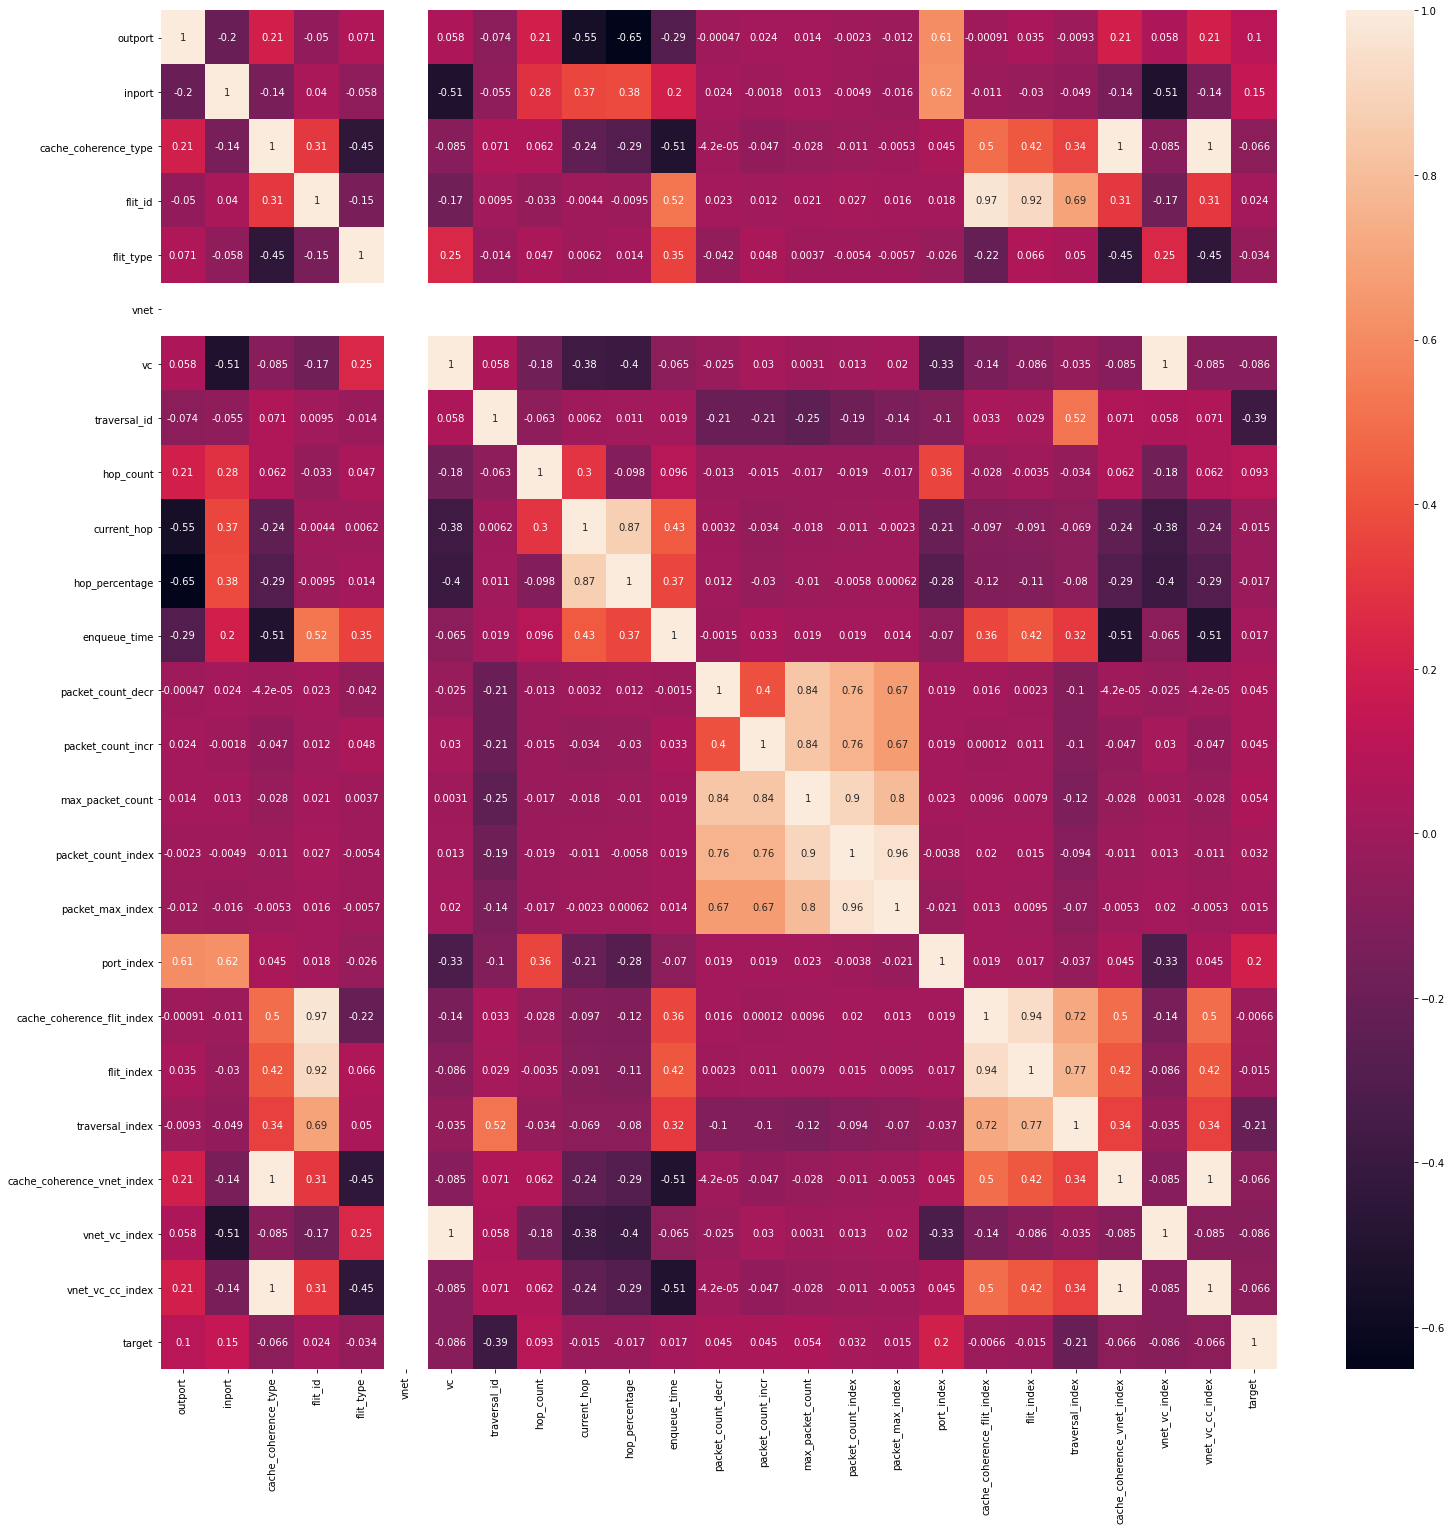

In [45]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot = True)
plt.show()

Processing Dataset for Training

In [46]:
train_X = df.drop(columns=['target'])
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,2,4,1,1,4,3,9,2,5,1,0.200000,8,1,1,1,1,1,8,1,4,8,3,27,9
1,4,2,1,1,4,3,9,3,4,2,0.500000,12,1,1,1,1,1,8,1,4,12,3,27,9
2,4,2,1,1,4,3,9,5,3,1,0.333333,8,1,1,1,1,1,8,1,4,20,3,27,9
3,2,4,1,1,4,3,9,6,4,1,0.250000,8,1,1,1,1,1,8,1,4,24,3,27,9
4,2,4,1,1,4,3,9,8,5,1,0.200000,8,1,1,1,1,1,8,1,4,32,3,27,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161599,3,2,5,2,2,3,9,20055,5,2,0.400000,19,1,1,1,1,1,6,10,20,401100,15,27,45
161600,3,2,5,3,2,3,9,20055,5,2,0.400000,26,1,1,1,1,1,6,15,30,601650,15,27,45
161601,3,2,5,4,2,3,9,20055,5,2,0.400000,33,1,1,1,1,1,6,20,40,802200,15,27,45
161602,3,2,5,5,3,3,9,20055,5,2,0.400000,40,1,1,1,1,1,6,25,75,1504125,15,27,45


In [47]:
#standardization
x = train_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = train_X.columns
x_scaled = min_max_scaler.fit_transform(x)
train_X = pd.DataFrame(x_scaled)
train_X.columns = columns
train_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.8,0.2,0.200000,0.057143,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000033,0.6,0.4,0.500000,0.114286,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.000001,0.000000,0.000000,0.000000
2,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000100,0.4,0.2,0.333333,0.057143,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.000004,0.000000,0.000000,0.000000
3,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000133,0.6,0.2,0.250000,0.057143,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.000006,0.000000,0.000000,0.000000
4,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000199,0.8,0.2,0.200000,0.057143,0.0,0.0,0.0,0.0,0.0,0.666667,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
161599,0.75,0.5,0.666667,0.25,0.333333,0.0,0.000000,0.666678,0.8,0.4,0.400000,0.214286,0.0,0.0,0.0,0.0,0.0,0.500000,0.310345,0.186047,0.148158,0.666667,0.000000,0.666667
161600,0.75,0.5,0.666667,0.50,0.333333,0.0,0.000000,0.666678,0.8,0.4,0.400000,0.314286,0.0,0.0,0.0,0.0,0.0,0.500000,0.482759,0.302326,0.222238,0.666667,0.000000,0.666667
161601,0.75,0.5,0.666667,0.75,0.333333,0.0,0.000000,0.666678,0.8,0.4,0.400000,0.414286,0.0,0.0,0.0,0.0,0.0,0.500000,0.655172,0.418605,0.296319,0.666667,0.000000,0.666667
161602,0.75,0.5,0.666667,1.00,0.666667,0.0,0.000000,0.666678,0.8,0.4,0.400000,0.514286,0.0,0.0,0.0,0.0,0.0,0.500000,0.827586,0.825581,0.555600,0.666667,0.000000,0.666667


In [48]:
train_X[train_X.duplicated()].shape

(5192, 24)

In [0]:
test_X = df5.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y = df5['target']

In [50]:
#standardization
x = test_X.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X = pd.DataFrame(x_scaled)
test_X.columns = columns
test_X

,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.00,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.333333,0.2,0.25,0.070175,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000046,0.166667,0.000000,0.166667
1,0.5,1.00,0.166667,0.00,1.000000,0.0,0.000000,0.000033,0.333333,0.2,0.25,0.070175,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000049,0.166667,0.000000,0.166667
2,0.5,1.00,0.166667,0.00,1.000000,0.0,0.000000,0.000067,0.333333,0.2,0.25,0.070175,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000052,0.166667,0.000000,0.166667
3,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000200,0.666667,1.0,1.00,0.350877,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,0.000200,0.000000,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000064,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16748,0.5,0.00,0.833333,0.75,0.333333,0.0,0.333333,0.999967,0.000000,0.0,0.00,0.368421,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533304,0.833333,0.333333,0.833333
16749,0.5,0.00,0.833333,1.00,0.666667,0.0,0.333333,0.999967,0.000000,0.0,0.00,0.491228,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
16750,0.5,0.00,0.166667,0.00,1.000000,0.0,0.666667,1.000000,0.000000,0.0,0.00,0.491228,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088834,0.166667,0.666667,0.166667
16751,0.5,0.00,1.000000,0.00,1.000000,0.0,1.000000,0.999967,0.666667,0.0,0.00,0.035088,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311067,1.000000,1.000000,1.000000


In [51]:
test_X[test_X.duplicated()].shape

(0, 24)

In [52]:
test_X1 = df6.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y1 = df6['target']
x = test_X1.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X1.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X1 = pd.DataFrame(x_scaled)
test_X1.columns = columns
print(test_X1[test_X1.duplicated()].shape)
test_X1

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.00,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.50,0.2,0.25,0.066667,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000047,0.166667,0.000000,0.166667
1,0.5,1.00,0.166667,0.00,1.000000,0.0,0.000000,0.000033,0.50,0.2,0.25,0.066667,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000050,0.166667,0.000000,0.166667
2,0.5,1.00,0.166667,0.00,1.000000,0.0,0.000000,0.000067,0.50,0.2,0.25,0.066667,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000053,0.166667,0.000000,0.166667
3,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000167,0.00,0.4,1.00,0.133333,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,0.000167,0.25,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000062,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16714,0.5,0.00,0.833333,0.75,0.333333,0.0,0.333333,0.999967,0.25,0.0,0.00,0.350000,0.0,0.0,0.0,0.0,0.0,0.0,0.793103,0.511628,0.533304,0.833333,0.333333,0.833333
16715,0.5,0.00,0.833333,1.00,0.666667,0.0,0.333333,0.999967,0.25,0.0,0.00,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
16716,0.5,0.00,0.166667,0.00,1.000000,0.0,0.666667,1.000000,0.25,0.0,0.00,0.466667,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088835,0.166667,0.666667,0.166667
16717,0.5,0.00,1.000000,0.00,1.000000,0.0,1.000000,0.999967,0.75,0.0,0.00,0.016667,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311068,1.000000,1.000000,1.000000


In [53]:
test_X2 = df7.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y2 = df7['target']
x = test_X2.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X2.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X2 = pd.DataFrame(x_scaled)
test_X2.columns = columns
print(test_X2[test_X2.duplicated()].shape)
test_X2

(22, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.8,0.2,0.200000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000200,0.6,0.2,0.250000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000009,0.000000,0.000000,0.000000
2,0.50,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000299,0.8,0.2,0.200000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,0.666667,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000
3,0.75,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000399,0.4,0.2,0.333333,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
4,0.75,1.0,0.000000,0.00,1.000000,0.0,0.000000,0.000532,0.8,0.2,0.200000,0.066667,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000024,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39101,0.50,1.0,0.666667,0.25,0.333333,0.0,0.000000,0.999967,0.6,0.2,0.250000,0.183333,0.133333,0.033333,0.166667,0.035294,0.007435,0.666667,0.310345,0.186047,0.222293,0.666667,0.000000,0.666667
39102,0.50,1.0,0.666667,0.50,0.333333,0.0,0.000000,0.999967,0.6,0.2,0.250000,0.300000,0.100000,0.066667,0.166667,0.043137,0.008948,0.666667,0.482759,0.302326,0.333441,0.666667,0.000000,0.666667
39103,0.50,1.0,0.666667,0.75,0.333333,0.0,0.000000,0.999967,0.6,0.2,0.250000,0.416667,0.066667,0.100000,0.166667,0.043137,0.008948,0.666667,0.655172,0.418605,0.444590,0.666667,0.000000,0.666667
39104,0.50,1.0,0.666667,1.00,0.666667,0.0,0.000000,0.999967,0.6,0.2,0.250000,0.533333,0.033333,0.133333,0.166667,0.035294,0.007435,0.666667,0.827586,0.825581,0.833610,0.666667,0.000000,0.666667


In [54]:
test_X3 = df8.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y3 = df8['target']
x = test_X3.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X3.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X3 = pd.DataFrame(x_scaled)
test_X3.columns = columns
print(test_X3[test_X3.duplicated()].shape)
test_X3

(33, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,0.00,0.000000,0.00,1.000000,0.0,0.000,0.000000,0.666667,0.0,0.0,0.000000,0.161290,0.000000,0.16129,0.01845,0.004022,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.75,0.500000,0.00,0.000000,1.0,1.000,0.000000,0.666667,0.8,1.0,0.246154,0.129032,0.032258,0.16129,0.03321,0.006779,0.0,0.103448,0.000000,0.000000,0.944444,1.000000,1.000000
2,0.0,0.75,0.500000,0.25,0.333333,1.0,1.000,0.000000,0.666667,0.8,1.0,0.261538,0.096774,0.064516,0.16129,0.04059,0.008158,0.0,0.241379,0.139535,0.000013,0.944444,1.000000,1.000000
3,0.0,0.75,0.500000,0.50,0.333333,1.0,1.000,0.000000,0.666667,0.8,1.0,0.276923,0.064516,0.096774,0.16129,0.04059,0.008158,0.0,0.379310,0.232558,0.000022,0.944444,1.000000,1.000000
4,0.0,0.75,0.500000,0.75,0.333333,1.0,1.000,0.000000,0.666667,0.8,1.0,0.292308,0.032258,0.129032,0.16129,0.03321,0.006779,0.0,0.517241,0.325581,0.000031,0.944444,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
76744,0.5,0.00,0.833333,1.00,0.666667,0.0,0.125,0.999867,0.500000,0.0,0.0,0.430769,0.096774,0.064516,0.16129,0.04059,0.008158,0.0,1.000000,1.000000,1.000000,0.833333,0.051724,0.494505
76745,0.5,0.00,0.166667,0.00,1.000000,0.0,0.250,0.999900,0.500000,0.0,0.0,0.430769,0.064516,0.096774,0.16129,0.04059,0.008158,0.0,0.034483,0.046512,0.088888,0.166667,0.103448,0.098901
76746,1.0,0.00,1.000000,0.00,1.000000,0.0,0.375,0.999867,0.666667,0.0,0.0,0.030769,0.032258,0.129032,0.16129,0.03321,0.006779,0.0,0.206897,0.279070,0.311108,1.000000,0.155172,0.593407
76747,0.0,0.75,0.333333,0.00,1.000000,0.0,0.000,0.999900,0.500000,0.6,1.0,0.184615,0.000000,0.161290,0.16129,0.01845,0.004022,0.0,0.068966,0.093023,0.133334,0.333333,0.000000,0.197802


In [55]:
test_X4 = df9.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y4 = df9['target']
x = test_X4.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X4.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X4 = pd.DataFrame(x_scaled)
test_X4.columns = columns
print(test_X4[test_X4.duplicated()].shape)
test_X4

(32, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,1.00,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000000,0.50,0.4,0.5,0.142857,0.0,0.0,0.0,0.0,0.0,1.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.75,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000299,0.50,0.4,0.5,0.142857,0.0,0.0,0.0,0.0,0.0,0.75,0.000000,0.000000,0.000013,0.000000,0.000000,0.000000
2,0.75,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000399,0.75,0.4,0.4,0.142857,0.0,0.0,0.0,0.0,0.0,0.75,0.000000,0.000000,0.000018,0.000000,0.000000,0.000000
3,0.75,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000599,0.75,0.4,0.4,0.142857,0.0,0.0,0.0,0.0,0.0,0.75,0.000000,0.000000,0.000027,0.000000,0.000000,0.000000
4,0.75,0.5,0.000000,0.00,1.000000,0.0,0.000000,0.000898,0.50,0.4,0.5,0.142857,0.0,0.0,0.0,0.0,0.0,0.75,0.000000,0.000000,0.000040,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29478,0.75,0.5,0.666667,0.25,0.333333,0.0,0.000000,0.999967,0.75,0.4,0.4,0.267857,0.0,0.0,0.0,0.0,0.0,0.75,0.310345,0.186047,0.222261,0.666667,0.000000,0.666667
29479,0.75,0.5,0.666667,0.50,0.333333,0.0,0.000000,0.999967,0.75,0.4,0.4,0.392857,0.0,0.0,0.0,0.0,0.0,0.75,0.482759,0.302326,0.333395,0.666667,0.000000,0.666667
29480,0.75,0.5,0.666667,0.75,0.333333,0.0,0.000000,0.999967,0.75,0.4,0.4,0.517857,0.0,0.0,0.0,0.0,0.0,0.75,0.655172,0.418605,0.444529,0.666667,0.000000,0.666667
29481,0.75,0.5,0.666667,1.00,0.666667,0.0,0.000000,0.999967,0.75,0.4,0.4,0.642857,0.0,0.0,0.0,0.0,0.0,0.75,0.827586,0.825581,0.833498,0.666667,0.000000,0.666667


In [56]:
test_X5 = df10.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y5 = df10['target']
x = test_X5.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X5.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X5 = pd.DataFrame(x_scaled)
test_X5.columns = columns
print(test_X5[test_X5.duplicated()].shape)
test_X5

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.00,0.166667,0.00,1.000000,0.0,0.000000,0.000000,0.50,0.2,0.25,0.066667,0.0,0.0,0.0,0.0,0.0,0.666667,0.034483,0.046512,0.000046,0.166667,0.000000,0.166667
1,0.5,1.00,0.166667,0.00,1.000000,0.0,0.000000,0.000033,0.50,0.2,0.25,0.066667,0.0,0.0,0.0,0.0,0.0,0.666667,0.034483,0.046512,0.000049,0.166667,0.000000,0.166667
2,0.5,1.00,0.166667,0.00,1.000000,0.0,0.000000,0.000067,0.50,0.2,0.25,0.066667,0.0,0.0,0.0,0.0,0.0,0.666667,0.034483,0.046512,0.000052,0.166667,0.000000,0.166667
3,0.0,0.75,0.000000,0.00,1.000000,0.0,0.000000,0.000200,0.00,0.4,1.00,0.133333,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.5,0.00,0.166667,0.00,1.000000,0.0,0.000000,0.000200,0.25,0.0,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.034483,0.046512,0.000064,0.166667,0.000000,0.166667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17343,0.5,0.00,0.833333,0.75,0.333333,0.0,0.333333,0.999967,0.25,0.0,0.00,0.350000,0.0,0.0,0.0,0.0,0.0,0.000000,0.793103,0.511628,0.533304,0.833333,0.333333,0.833333
17344,0.5,0.00,0.833333,1.00,0.666667,0.0,0.333333,0.999967,0.25,0.0,0.00,0.466667,0.0,0.0,0.0,0.0,0.0,0.000000,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
17345,0.5,0.00,0.166667,0.00,1.000000,0.0,0.666667,1.000000,0.25,0.0,0.00,0.466667,0.0,0.0,0.0,0.0,0.0,0.000000,0.034483,0.046512,0.088834,0.166667,0.666667,0.166667
17346,0.5,0.00,1.000000,0.00,1.000000,0.0,1.000000,0.999967,0.75,0.0,0.00,0.033333,0.0,0.0,0.0,0.0,0.0,0.000000,0.206897,0.279070,0.311067,1.000000,1.000000,1.000000


In [57]:
test_X6 = df14.drop(columns=['target','timestamp','src_ni','src_router','dst_ni','dst_router'])
test_Y6 = df14['target']
x = test_X6.values
min_max_scaler = preprocessing.MinMaxScaler()
columns = test_X6.columns
x_scaled = min_max_scaler.fit_transform(x)
test_X6 = pd.DataFrame(x_scaled)
test_X6.columns = columns
print(test_X6[test_X6.duplicated()].shape)
test_X6

(0, 24)


,outport,inport,cache_coherence_type,flit_id,flit_type,vnet,vc,traversal_id,hop_count,current_hop,hop_percentage,enqueue_time,packet_count_decr,packet_count_incr,max_packet_count,packet_count_index,packet_max_index,port_index,cache_coherence_flit_index,flit_index,traversal_index,cache_coherence_vnet_index,vnet_vc_index,vnet_vc_cc_index
0,0.5,1.00,0.166667,0.0,1.000000,0.0,0.000000,0.00000,0.50,0.25,0.25,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000044,0.166667,0.000000,0.166667
1,0.5,1.00,0.166667,0.0,1.000000,0.0,0.000000,0.00010,0.50,0.25,0.25,0.083333,0.0,0.0,0.0,0.0,0.0,1.0,0.034483,0.046512,0.000053,0.166667,0.000000,0.166667
2,0.0,0.75,0.000000,0.0,1.000000,0.0,0.000000,0.00020,0.00,0.50,1.00,0.166667,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,0.5,0.00,0.166667,0.0,1.000000,0.0,0.000000,0.00020,0.25,0.00,0.00,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.000062,0.166667,0.000000,0.166667
4,0.0,0.75,0.333333,0.0,1.000000,0.0,0.000000,0.00020,0.25,0.75,1.00,0.250000,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.000124,0.333333,0.000000,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11252,0.5,0.00,0.833333,1.0,0.666667,0.0,0.333333,0.99990,0.25,0.00,0.00,0.583333,0.0,0.0,0.0,0.0,0.0,0.0,1.000000,1.000000,1.000000,0.833333,0.333333,0.833333
11253,0.5,0.00,0.166667,0.0,1.000000,0.0,0.666667,0.99995,0.25,0.00,0.00,0.583333,0.0,0.0,0.0,0.0,0.0,0.0,0.034483,0.046512,0.088837,0.166667,0.666667,0.166667
11254,1.0,0.00,1.000000,0.0,1.000000,0.0,1.000000,0.99990,0.50,0.00,0.00,0.020833,0.0,0.0,0.0,0.0,0.0,0.0,0.206897,0.279070,0.311068,1.000000,1.000000,1.000000
11255,0.0,0.75,0.333333,0.0,1.000000,0.0,0.000000,0.99995,0.25,0.75,1.00,0.270833,0.0,0.0,0.0,0.0,0.0,0.0,0.068966,0.093023,0.133286,0.333333,0.000000,0.333333


#### Machine Learning Models

Module Imports for Data Processing and Report Generation in Machine Learning Models

In [0]:
from sklearn.model_selection import train_test_split

import statsmodels.api as sm
from sklearn import metrics

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score

Labels

1.   0 -  malicious
2.   1 -  good



In [59]:
train_Y = df['target']
train_Y.value_counts()

0    80992
1    80612
Name: target, dtype: int64

Training and Validation Splitting of the Dataset

In [0]:
seed = 5
np.random.seed(seed)

In [0]:
X_train, X_test, y_train, y_test = train_test_split(train_X, train_Y, test_size=0.2, random_state=seed, shuffle=True)

Feature Selection

                         Specs        Score
7                 traversal_id  2701.680459
17                  port_index  1650.533567
20             traversal_index  1030.152156
1                       inport   646.079227
6                           vc   495.453359
22               vnet_vc_index   495.453359
0                      outport   260.866562
14            max_packet_count   145.035179
8                    hop_count    95.523360
12           packet_count_decr    74.145153
13           packet_count_incr    70.911824
2         cache_coherence_type    66.392618
21  cache_coherence_vnet_index    66.392618
23            vnet_vc_cc_index    66.392618
4                    flit_type    39.644644
15          packet_count_index    32.223317
3                      flit_id    30.614367


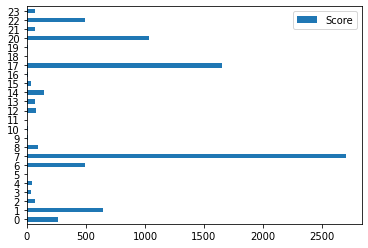

In [62]:
#SelectKBest for feature selection
bf = SelectKBest(score_func=chi2, k=17)
fit = bf.fit(X_train,y_train)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(columns)

featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] 
print(featureScores.nlargest(17,'Score'))
featureScores.plot(kind='barh')

Logistic Regression

In [0]:
#logistic regression
from sklearn.linear_model import LogisticRegression

In [0]:
logit_model=sm.Logit(train_Y,train_X)
#result=logit_model.fit()
#print(result.summary2())

In [65]:
logreg = LogisticRegression(C=5,penalty='l2',random_state=42, max_iter=500)
logreg.fit(X_train, y_train)

LogisticRegression(C=5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=500,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [66]:
y_pred = logreg.predict(X_test)
logreg_score_train = logreg.score(X_train,y_train)
print("Train Prediction Score",logreg_score_train*100)
logreg_score_test = accuracy_score(y_test,y_pred)
print("Test Prediction ",logreg_score_test*100)

Train Prediction Score 67.30737993394337
Test Prediction  67.17923331580087


In [67]:
y_pred_test = logreg.predict(test_X)
logreg_score_test = accuracy_score(test_Y,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  76.94741240374859


In [68]:
y_pred_test = logreg.predict(test_X1)
logreg_score_test = accuracy_score(test_Y1,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  71.68490938453257


In [69]:
y_pred_test = logreg.predict(test_X2)
logreg_score_test = accuracy_score(test_Y2,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  50.452615966859305


In [70]:
y_pred_test = logreg.predict(test_X3)
logreg_score_test = accuracy_score(test_Y3,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  57.13690080652517


In [71]:
y_pred_test = logreg.predict(test_X4)
logreg_score_test = accuracy_score(test_Y4,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  58.15215547942883


In [72]:
y_pred_test = logreg.predict(test_X5)
logreg_score_test = accuracy_score(test_Y5,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  75.62831450311275


In [73]:
y_pred_test = logreg.predict(test_X6)
logreg_score_test = accuracy_score(test_Y6,y_pred_test)
print("Test Prediction ",logreg_score_test*100)

Test Prediction  24.367060495691568


In [74]:
feature_importance=pd.DataFrame(np.hstack((np.array([columns[::]]).T, logreg.coef_.T)), columns=['feature', 'importance'])
feature_importance['importance']=pd.to_numeric(feature_importance['importance'])
feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
3,flit_id,5.528796
8,hop_count,1.123079
17,port_index,1.013550
19,flit_index,1.008337
10,hop_percentage,0.783736
16,packet_max_index,0.459523
22,vnet_vc_index,0.165237
6,vc,0.165237
15,packet_count_index,0.142136
23,vnet_vc_cc_index,0.087258


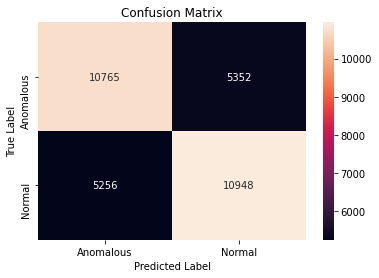

In [75]:
cm = confusion_matrix(y_test, y_pred)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [76]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67     16117
           1       0.67      0.68      0.67     16204

    accuracy                           0.67     32321
   macro avg       0.67      0.67      0.67     32321
weighted avg       0.67      0.67      0.67     32321



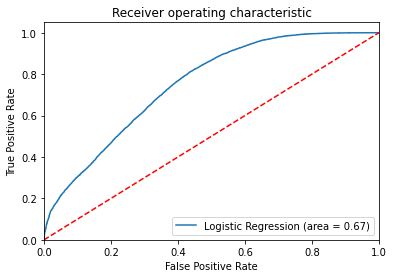

In [77]:
logit_roc_auc = roc_auc_score(y_test, logreg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LOG_ROC')
plt.show()

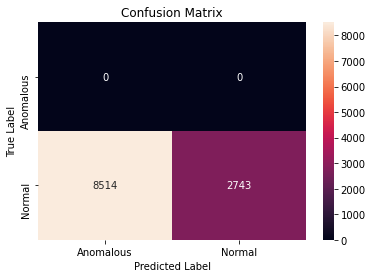

In [78]:
cm = confusion_matrix(test_Y6, y_pred_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [79]:
print(classification_report(test_Y6, y_pred_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.24      0.39     11257

    accuracy                           0.24     11257
   macro avg       0.50      0.12      0.20     11257
weighted avg       1.00      0.24      0.39     11257



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


KNeighbors Classifier

In [80]:
#KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [0]:
y_pred_knn= knn.predict(X_test)

In [82]:
knn_score_train = knn.score(X_train,y_train)
print("Train Prediction Score",knn_score_train*100)
knn_score_test = accuracy_score(y_test,y_pred_knn)
print("Test Prediction ",knn_score_test*100)

Train Prediction Score 88.73556461406372
Test Prediction  80.29763930571455


In [83]:
y_pred_knn_test= knn.predict(test_X)
knn_score_test = accuracy_score(test_Y,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  75.11490479317138


In [84]:
y_pred_knn_test= knn.predict(test_X1)
knn_score_test = accuracy_score(test_Y1,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  73.55104970392966


In [85]:
y_pred_knn_test= knn.predict(test_X2)
knn_score_test = accuracy_score(test_Y2,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  29.611824272490157


In [86]:
y_pred_knn_test= knn.predict(test_X3)
knn_score_test = accuracy_score(test_Y3,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  73.53581154151846


In [87]:
y_pred_knn_test= knn.predict(test_X4)
knn_score_test = accuracy_score(test_Y4,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  44.568056167961196


In [88]:
y_pred_knn_test= knn.predict(test_X5)
knn_score_test = accuracy_score(test_Y5,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  72.04865114134195


In [89]:
y_pred_knn_test= knn.predict(test_X6)
knn_score_test = accuracy_score(test_Y6,y_pred_knn_test)
print("Test Prediction ",knn_score_test*100)

Test Prediction  33.98774096117971


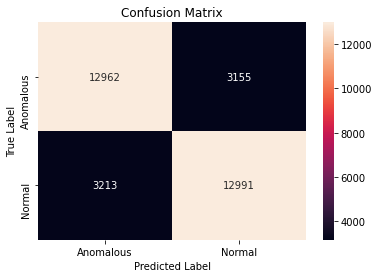

In [90]:
cm = confusion_matrix(y_test, y_pred_knn)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [91]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80     16117
           1       0.80      0.80      0.80     16204

    accuracy                           0.80     32321
   macro avg       0.80      0.80      0.80     32321
weighted avg       0.80      0.80      0.80     32321



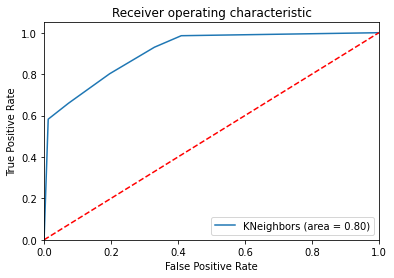

In [92]:
knn_roc_auc = roc_auc_score(y_test, y_pred_knn)
fpr, tpr, thresholds = roc_curve(y_test, knn.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNeighbors (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('KNN_ROC')
plt.show()

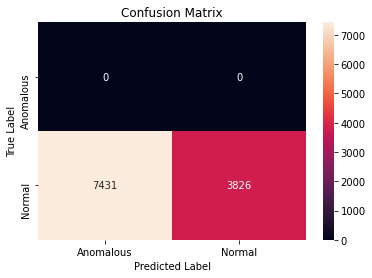

In [93]:
cm = confusion_matrix(test_Y6, y_pred_knn_test)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [94]:
print(classification_report(test_Y6,y_pred_knn_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.34      0.51     11257

    accuracy                           0.34     11257
   macro avg       0.50      0.17      0.25     11257
weighted avg       1.00      0.34      0.51     11257



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Naive Bayes Classifier

In [0]:
#naive_bayes
from sklearn.naive_bayes import GaussianNB

In [96]:
nb = GaussianNB()
nb.fit(X_train,y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [0]:
y_pred_nb= nb.predict(X_test)

In [98]:
nb_score_train = nb.score(X_train,y_train)
print("Train Prediction Score",nb_score_train*100)
nb_score_test = accuracy_score(y_test,y_pred_nb)
print("Test Prediction Score",nb_score_test*100)

Train Prediction Score 67.07997184471276
Test Prediction Score 66.8265214566381


In [99]:
y_pred_nb_test= nb.predict(test_X)
nb_score_test = accuracy_score(test_Y,y_pred_nb_test)
print("Test Prediction Score",nb_score_test*100)

Test Prediction Score 76.0520503790366


In [100]:
y_pred_nb_test= nb.predict(test_X1)
nb_score_test = accuracy_score(test_Y1,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  75.71625097194809


In [101]:
y_pred_nb_test= nb.predict(test_X2)
nb_score_test = accuracy_score(test_Y2,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  42.67120135017644


In [102]:
y_pred_nb_test= nb.predict(test_X3)
nb_score_test = accuracy_score(test_Y3,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  40.80313750016287


In [103]:
y_pred_nb_test= nb.predict(test_X4)
nb_score_test = accuracy_score(test_Y4,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  55.44890275752128


In [104]:
y_pred_nb_test= nb.predict(test_X5)
nb_score_test = accuracy_score(test_Y5,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  76.91952962877565


In [105]:
y_pred_nb_test= nb.predict(test_X6)
nb_score_test = accuracy_score(test_Y6,y_pred_nb_test)
print("Test Prediction ",nb_score_test*100)

Test Prediction  24.677978146930798


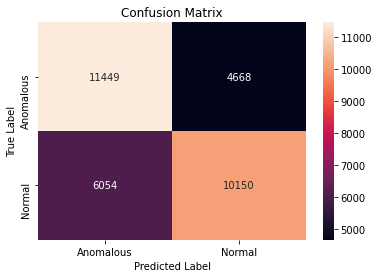

In [106]:
cm = confusion_matrix(y_test, y_pred_nb)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [107]:
print(classification_report(y_test,y_pred_nb))

              precision    recall  f1-score   support

           0       0.65      0.71      0.68     16117
           1       0.68      0.63      0.65     16204

    accuracy                           0.67     32321
   macro avg       0.67      0.67      0.67     32321
weighted avg       0.67      0.67      0.67     32321



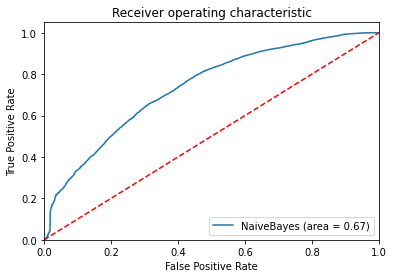

In [108]:
nb_roc_auc = roc_auc_score(y_test, y_pred_nb)
fpr, tpr, thresholds = roc_curve(y_test, nb.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='NaiveBayes (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('NB_ROC')
plt.show()

### Neural Networks

In [109]:
#neuralnetwork
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import BatchNormalization, Dropout
from keras.optimizers import SGD
from keras.layers import PReLU

Using TensorFlow backend.


2-Layer Neural Network

In [110]:
#2layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(2, activation='relu', input_shape=(n_cols,)))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2 )

Train on 103426 samples, validate on 25857 samples
Epoch 1/10
103426/103426 [==============================] - 4s 39us/step - loss: 0.2205 - accuracy: 0.6447 - val_loss: 0.2010 - val_accuracy: 0.6780
Epoch 2/10
103426/103426 [==============================] - 4s 39us/step - loss: 0.1945 - accuracy: 0.6829 - val_loss: 0.1903 - val_accuracy: 0.6836
Epoch 3/10
103426/103426 [==============================] - 4s 39us/step - loss: 0.1850 - accuracy: 0.6936 - val_loss: 0.1811 - val_accuracy: 0.7055
Epoch 4/10
103426/103426 [==============================] - 4s 36us/step - loss: 0.1776 - accuracy: 0.7087 - val_loss: 0.1756 - val_accuracy: 0.7167
Epoch 5/10
103426/103426 [==============================] - 4s 35us/step - loss: 0.1736 - accuracy: 0.7186 - val_loss: 0.1729 - val_accuracy: 0.7227
Epoch 6/10
103426/103426 [==============================] - 4s 36us/step - loss: 0.1714 - accuracy: 0.7223 - val_loss: 0.1713 - val_accuracy: 0.7198
Epoch 7/10
103426/103426 [=============================

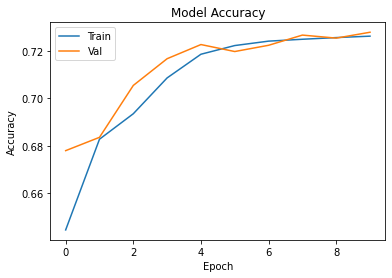

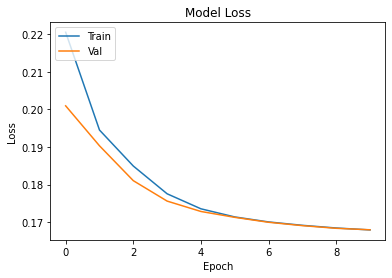

In [111]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [112]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 72.33%


In [113]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 67.77%


In [114]:
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 64.09%


In [115]:
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 41.23%


In [116]:
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 91.78%


In [117]:
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 38.88%


In [118]:
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 87.39%


In [119]:
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 32.42%


3-Layer Neural Network

In [120]:
#3layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(4, activation="relu", input_shape=(n_cols,)))
model.add(Dense(2, activation="relu"))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2 )

Train on 103426 samples, validate on 25857 samples
Epoch 1/30
103426/103426 [==============================] - 4s 36us/step - loss: 0.2318 - accuracy: 0.6436 - val_loss: 0.2184 - val_accuracy: 0.6717
Epoch 2/30
103426/103426 [==============================] - 4s 35us/step - loss: 0.2121 - accuracy: 0.6796 - val_loss: 0.2078 - val_accuracy: 0.6850
Epoch 3/30
103426/103426 [==============================] - 4s 36us/step - loss: 0.2050 - accuracy: 0.6757 - val_loss: 0.2026 - val_accuracy: 0.6809
Epoch 4/30
103426/103426 [==============================] - 4s 35us/step - loss: 0.2029 - accuracy: 0.6751 - val_loss: 0.2016 - val_accuracy: 0.6773
Epoch 5/30
103426/103426 [==============================] - 4s 35us/step - loss: 0.2024 - accuracy: 0.6749 - val_loss: 0.2014 - val_accuracy: 0.6823
Epoch 6/30
103426/103426 [==============================] - 4s 35us/step - loss: 0.2020 - accuracy: 0.6766 - val_loss: 0.2009 - val_accuracy: 0.6792
Epoch 7/30
103426/103426 [=============================

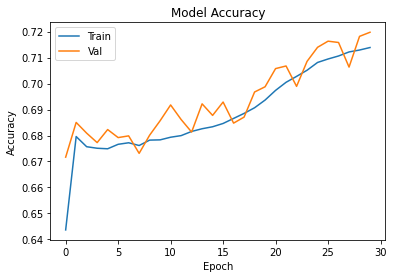

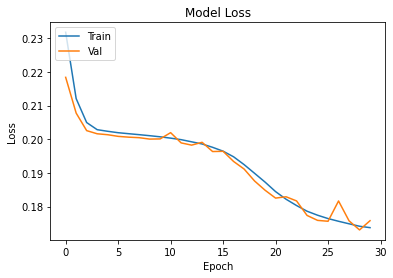

In [121]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [122]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 71.43%


In [123]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 69.78%
accuracy: 56.62%
accuracy: 28.48%
accuracy: 51.34%
accuracy: 36.44%
accuracy: 78.68%
accuracy: 38.23%


4-Layer Neural Network



In [124]:
#4layer
model = Sequential()
n_cols = X_train.shape[1]
n_cols
model.add(Dense(8, activation='relu', input_shape=(n_cols,)))
model.add(Dense(4, activation='relu'))
model.add(Dense(2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='sgd', loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=30, validation_split=0.2)

Train on 103426 samples, validate on 25857 samples
Epoch 1/30
103426/103426 [==============================] - 4s 36us/step - loss: 0.2465 - accuracy: 0.5761 - val_loss: 0.2387 - val_accuracy: 0.6417
Epoch 2/30
103426/103426 [==============================] - 4s 35us/step - loss: 0.2217 - accuracy: 0.6641 - val_loss: 0.2077 - val_accuracy: 0.6768
Epoch 3/30
103426/103426 [==============================] - 4s 36us/step - loss: 0.2021 - accuracy: 0.6796 - val_loss: 0.1985 - val_accuracy: 0.6936
Epoch 4/30
103426/103426 [==============================] - 4s 35us/step - loss: 0.1968 - accuracy: 0.6901 - val_loss: 0.1951 - val_accuracy: 0.6969
Epoch 5/30
103426/103426 [==============================] - 4s 36us/step - loss: 0.1941 - accuracy: 0.6955 - val_loss: 0.1945 - val_accuracy: 0.6984
Epoch 6/30
103426/103426 [==============================] - 4s 35us/step - loss: 0.1927 - accuracy: 0.6979 - val_loss: 0.1921 - val_accuracy: 0.6999
Epoch 7/30
103426/103426 [=============================

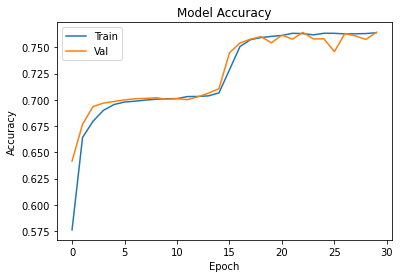

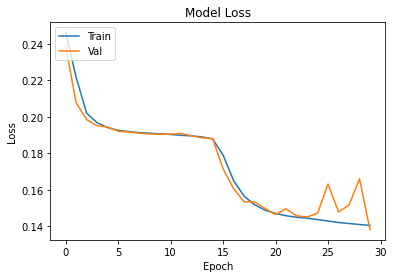

In [125]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [126]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 75.90%


In [127]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 56.64%
accuracy: 49.97%
accuracy: 35.92%
accuracy: 50.59%
accuracy: 32.90%
accuracy: 70.86%
accuracy: 44.93%


5-Layer Neural Network Optimized

In [128]:
#5layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=100, validation_split=0.2)

Train on 103426 samples, validate on 25857 samples
Epoch 1/100
103426/103426 [==============================] - 7s 72us/step - loss: 0.1484 - accuracy: 0.7434 - val_loss: 0.1453 - val_accuracy: 0.7410
Epoch 2/100
103426/103426 [==============================] - 7s 66us/step - loss: 0.1367 - accuracy: 0.7563 - val_loss: 0.1298 - val_accuracy: 0.7690
Epoch 3/100
103426/103426 [==============================] - 7s 67us/step - loss: 0.1337 - accuracy: 0.7596 - val_loss: 0.1272 - val_accuracy: 0.7651
Epoch 4/100
103426/103426 [==============================] - 7s 67us/step - loss: 0.1306 - accuracy: 0.7667 - val_loss: 0.1285 - val_accuracy: 0.7776
Epoch 5/100
103426/103426 [==============================] - 7s 67us/step - loss: 0.1281 - accuracy: 0.7729 - val_loss: 0.1289 - val_accuracy: 0.7783
Epoch 6/100
103426/103426 [==============================] - 7s 69us/step - loss: 0.1270 - accuracy: 0.7752 - val_loss: 0.1218 - val_accuracy: 0.7869
Epoch 7/100
103426/103426 [======================

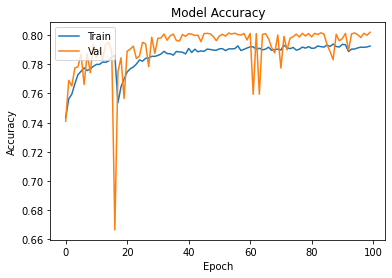

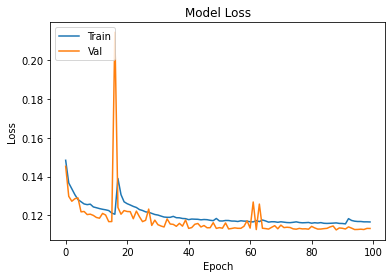

In [129]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [130]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.65%


In [131]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 78.20%
accuracy: 59.55%
accuracy: 32.13%
accuracy: 71.77%
accuracy: 42.43%
accuracy: 51.23%
accuracy: 52.53%


In [132]:
#6layer
model = Sequential()
n_cols = X_train.shape[1]
model.add(Dense(32, input_shape=(n_cols,),kernel_initializer='RandomUniform'))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(16))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(8))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dense(4))
model.add(PReLU())
model.add(Dense(2))
model.add(PReLU())
model.add(BatchNormalization())
model.add(Dropout(0.001,seed=5))
model.add(Dense(1, activation='hard_sigmoid', kernel_initializer = "RandomUniform"))
opt = SGD(lr=0.02, momentum=0.9)
model.compile(optimizer=opt, loss='mean_squared_error', metrics=['accuracy'])
early_stopping_monitor = EarlyStopping(patience=20)
history = model.fit(X_train, y_train, epochs=50, validation_split=0.2)

Train on 103426 samples, validate on 25857 samples
Epoch 1/50
103426/103426 [==============================] - 8s 80us/step - loss: 0.1516 - accuracy: 0.7361 - val_loss: 0.1321 - val_accuracy: 0.7628
Epoch 2/50
103426/103426 [==============================] - 7s 72us/step - loss: 0.1360 - accuracy: 0.7568 - val_loss: 0.1290 - val_accuracy: 0.7716
Epoch 3/50
103426/103426 [==============================] - 8s 73us/step - loss: 0.1330 - accuracy: 0.7603 - val_loss: 0.1288 - val_accuracy: 0.7702
Epoch 4/50
103426/103426 [==============================] - 8s 73us/step - loss: 0.1304 - accuracy: 0.7656 - val_loss: 0.1248 - val_accuracy: 0.7871
Epoch 5/50
103426/103426 [==============================] - 8s 74us/step - loss: 0.1293 - accuracy: 0.7700 - val_loss: 0.1210 - val_accuracy: 0.7840
Epoch 6/50
103426/103426 [==============================] - 11s 102us/step - loss: 0.1270 - accuracy: 0.7769 - val_loss: 0.1210 - val_accuracy: 0.7614
Epoch 7/50
103426/103426 [===========================

In [133]:
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 79.18%


In [134]:
scores = model.evaluate(test_X, test_Y, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X1, test_Y1, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X2, test_Y2, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X3, test_Y3, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X4, test_Y4, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X5, test_Y5, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
scores = model.evaluate(test_X6, test_Y6, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

accuracy: 83.31%
accuracy: 72.04%
accuracy: 21.30%
accuracy: 84.81%
accuracy: 39.50%
accuracy: 65.75%
accuracy: 28.89%


Decision Tree Classifier

In [0]:
#decisiontreee
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [136]:
dt = DecisionTreeClassifier(max_depth=24,max_features=24,random_state = 42)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=24, max_features=24, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [0]:
y_pred_dt= dt.predict(X_test)

In [138]:
dt_score_train = dt.score(X_train,y_train)
print("Train Prediction Score",dt_score_train*100)
dt_score_test = accuracy_score(y_test,y_pred_dt)
print("Test Prediction Score",dt_score_test*100)

Train Prediction Score 91.17749433413519
Test Prediction Score 88.20581046378516


In [139]:
y_pred_dt_test= dt.predict(test_X)
dt_score_test = accuracy_score(test_Y,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X1)
dt_score_test = accuracy_score(test_Y1,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X2)
dt_score_test = accuracy_score(test_Y2,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X3)
dt_score_test = accuracy_score(test_Y3,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X4)
dt_score_test = accuracy_score(test_Y4,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X5)
dt_score_test = accuracy_score(test_Y5,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)
y_pred_dt_test= dt.predict(test_X6)
dt_score_test = accuracy_score(test_Y6,y_pred_dt_test)
print("Test Prediction Score",dt_score_test*100)

Test Prediction Score 83.85960723452516
Test Prediction Score 66.97769005323285
Test Prediction Score 50.45517311921445
Test Prediction Score 65.45622744270284
Test Prediction Score 52.2300987009463
Test Prediction Score 67.28153101222043
Test Prediction Score 34.20982499777916


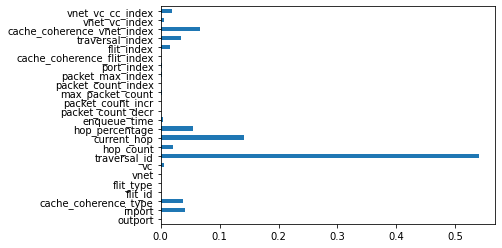

In [140]:
feat_importances = pd.Series(dt.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

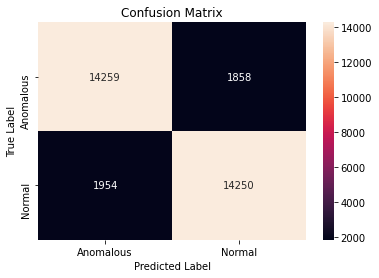

In [141]:
cm = confusion_matrix(y_test, y_pred_dt)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [142]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     16117
           1       0.88      0.88      0.88     16204

    accuracy                           0.88     32321
   macro avg       0.88      0.88      0.88     32321
weighted avg       0.88      0.88      0.88     32321



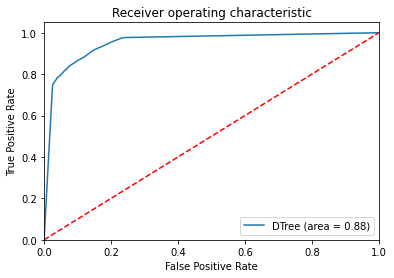

In [143]:
dt_roc_auc = roc_auc_score(y_test, y_pred_dt)
fpr, tpr, thresholds = roc_curve(y_test, dt.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='DTree (area = %0.2f)' % dt_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('DT_ROC')
plt.show()

Random Forest Classifier

In [0]:
#randomforest
from sklearn.ensemble import RandomForestClassifier

In [145]:
rf = RandomForestClassifier(max_depth=24,max_features=24,n_estimators=125,random_state=42)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=24, max_features=24,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=125,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [0]:
y_pred_rf= rf.predict(X_test)

In [147]:
rf_score_train = rf.score(X_train,y_train)
print("Train Prediction Score",rf_score_train*100)
rf_score_test = accuracy_score(y_test,y_pred_rf)
print("Test Prediction Score",rf_score_test*100)

Train Prediction Score 96.91993533565898
Test Prediction Score 91.244082794468


In [148]:
y_pred_rf_test= rf.predict(test_X)
rf_score_test = accuracy_score(test_Y,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X1)
rf_score_test = accuracy_score(test_Y1,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X2)
rf_score_test = accuracy_score(test_Y2,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X3)
rf_score_test = accuracy_score(test_Y3,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X4)
rf_score_test = accuracy_score(test_Y4,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X5)
rf_score_test = accuracy_score(test_Y5,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)
y_pred_rf_test= rf.predict(test_X6)
rf_score_test = accuracy_score(test_Y6,y_pred_rf_test)
print("Test Prediction Score",rf_score_test*100)

Test Prediction Score 76.52957679221632
Test Prediction Score 58.77145762306358
Test Prediction Score 50.36822993913977
Test Prediction Score 75.67525309776023
Test Prediction Score 47.46803242546552
Test Prediction Score 58.75605257090154
Test Prediction Score 42.80891889490984


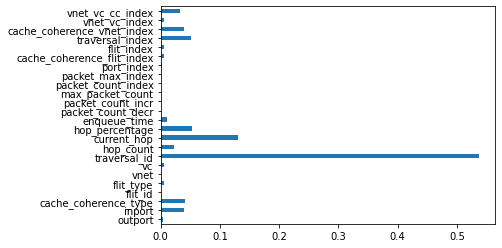

In [149]:
feat_importances = pd.Series(rf.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

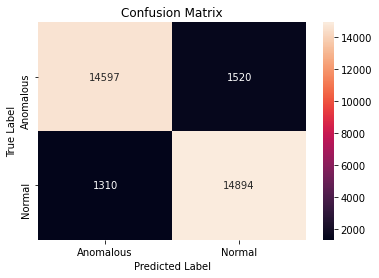

In [150]:
cm = confusion_matrix(y_test, y_pred_rf)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [151]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

           0       0.92      0.91      0.91     16117
           1       0.91      0.92      0.91     16204

    accuracy                           0.91     32321
   macro avg       0.91      0.91      0.91     32321
weighted avg       0.91      0.91      0.91     32321



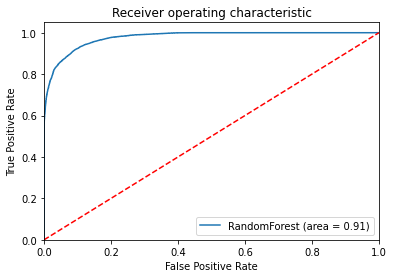

In [152]:
rf_roc_auc = roc_auc_score(y_test, y_pred_rf)
fpr, tpr, thresholds = roc_curve(y_test, rf.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='RandomForest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('RF_ROC')
plt.show()

XGBoost Classifier

In [0]:
#xgboost
from xgboost import XGBClassifier
from xgboost import plot_importance

In [154]:
xgbc = XGBClassifier(max_depth=24,min_child_weight=1,n_estimators=500,random_state=42,learning_rate=0.2)
xgbc.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.2, max_delta_step=0, max_depth=24,
              min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=42,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [0]:
y_pred_xgbc= xgbc.predict(X_test)

In [156]:
xgbc_score_train = xgbc.score(X_train,y_train)
print("Train Prediction Score",xgbc_score_train*100)
xgbc_score_test = accuracy_score(y_test,y_pred_xgbc)
print("Test Prediction Score",xgbc_score_test*100)

Train Prediction Score 98.95655267900652
Test Prediction Score 93.89560966554252


In [157]:
y_pred_xgbc_test= xgbc.predict(test_X)
xgbc_score_test = accuracy_score(test_Y,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X1)
xgbc_score_test = accuracy_score(test_Y1,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X2)
xgbc_score_test = accuracy_score(test_Y2,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X3)
xgbc_score_test = accuracy_score(test_Y3,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X4)
xgbc_score_test = accuracy_score(test_Y4,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X5)
xgbc_score_test = accuracy_score(test_Y5,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)
y_pred_xgbc_test= xgbc.predict(test_X6)
xgbc_score_test = accuracy_score(test_Y6,y_pred_xgbc_test)
print("Test Prediction Score",xgbc_score_test*100)

Test Prediction Score 78.90527069778547
Test Prediction Score 54.64441653208924
Test Prediction Score 50.32475834910244
Test Prediction Score 73.54102333580893
Test Prediction Score 45.392259946409794
Test Prediction Score 64.88932441780032
Test Prediction Score 39.00684018832726


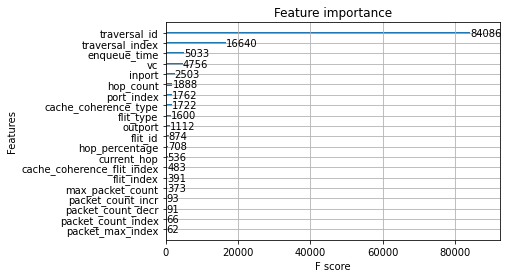

In [158]:
plot_importance(xgbc)
plt.show()

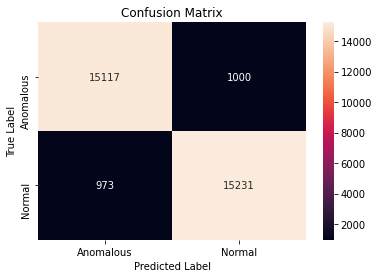

In [159]:
cm = confusion_matrix(y_test, y_pred_xgbc)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [160]:
print(classification_report(y_test,y_pred_xgbc))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94     16117
           1       0.94      0.94      0.94     16204

    accuracy                           0.94     32321
   macro avg       0.94      0.94      0.94     32321
weighted avg       0.94      0.94      0.94     32321



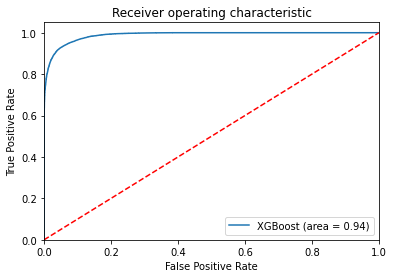

In [161]:
xgb_roc_auc = roc_auc_score(y_test, y_pred_xgbc)
fpr, tpr, thresholds = roc_curve(y_test, xgbc.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (area = %0.2f)' % xgb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('XGB_ROC')
plt.show()

LightGBM Classifier

In [0]:
#lightgbm
import lightgbm as lgb

In [163]:
gbm = lgb.LGBMClassifier(learning_rate = 0.6,  n_estimators = 500, max_depth = 24, random_state=42, min_child_weight=1,metric='binary',boosting_type = 'dart')
gbm.fit(X_train, y_train)

LGBMClassifier(boosting_type='dart', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.6, max_depth=24,
               metric='binary', min_child_samples=20, min_child_weight=1,
               min_split_gain=0.0, n_estimators=500, n_jobs=-1, num_leaves=31,
               objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

In [0]:
y_pred_gbm= gbm.predict(X_test)

In [165]:
gbm_score_train = gbm.score(X_train,y_train)
print("Train Prediction Score",gbm_score_train*100)
gbm_score_test = accuracy_score(y_test,y_pred_gbm)
print("Test Prediction Score",gbm_score_test*100)

Train Prediction Score 86.11727760030321
Test Prediction Score 83.88973113455648


In [166]:
y_pred_gbm_test = gbm.predict(test_X)
gbm_score_test = accuracy_score(test_Y,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X1)
gbm_score_test = accuracy_score(test_Y1,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X2)
gbm_score_test = accuracy_score(test_Y2,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X3)
gbm_score_test = accuracy_score(test_Y3,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X4)
gbm_score_test = accuracy_score(test_Y4,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X5)
gbm_score_test = accuracy_score(test_Y5,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)
y_pred_gbm_test = gbm.predict(test_X6)
gbm_score_test = accuracy_score(test_Y6,y_pred_gbm_test)
print("Test Prediction Score",gbm_score_test*100)

Test Prediction Score 77.28764997313914
Test Prediction Score 53.39434176685208
Test Prediction Score 51.14816140745666
Test Prediction Score 86.78288967934435
Test Prediction Score 45.392259946409794
Test Prediction Score 59.04427023287987
Test Prediction Score 48.89402149773474


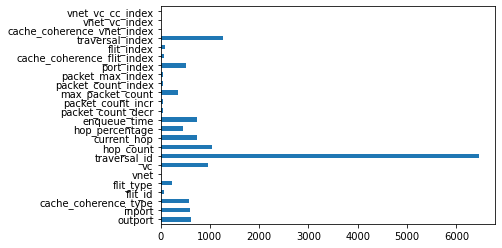

In [167]:
feat_importances = pd.Series(gbm.feature_importances_, index=columns)
feat_importances.plot(kind='barh')

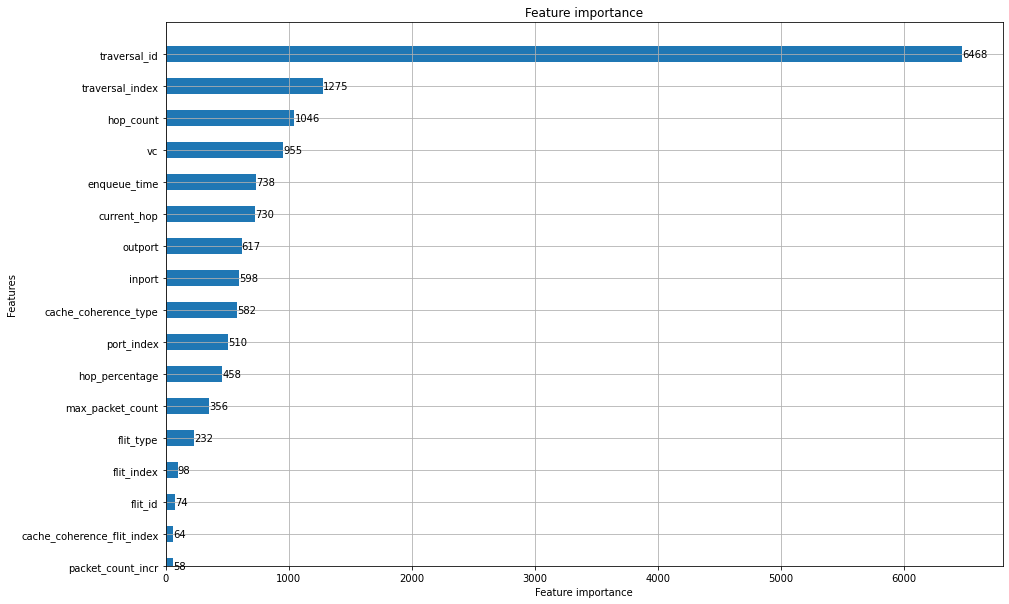

In [168]:
ax = lgb.plot_importance(gbm, height = 0.5, max_num_features = 17, xlim = (0,6800), ylim = (0,17), figsize = (15,10))
plt.show()

In [169]:
sorted(gbm.feature_importances_,reverse=True)

[6468,
 1275,
 1046,
 955,
 738,
 730,
 617,
 598,
 582,
 510,
 458,
 356,
 232,
 98,
 74,
 64,
 58,
 52,
 48,
 41,
 0,
 0,
 0,
 0]

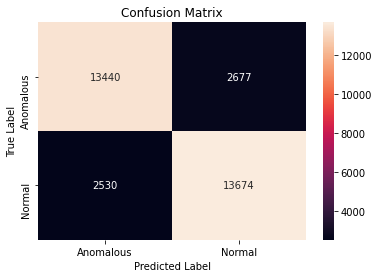

In [170]:
cm = confusion_matrix(y_test, y_pred_gbm)
class_label = ["Anomalous", "Normal"]
df_cm = pd.DataFrame(cm, index=class_label,columns=class_label)
sns.heatmap(df_cm, annot=True, fmt='d')
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [171]:
print(classification_report(y_test,y_pred_gbm))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84     16117
           1       0.84      0.84      0.84     16204

    accuracy                           0.84     32321
   macro avg       0.84      0.84      0.84     32321
weighted avg       0.84      0.84      0.84     32321



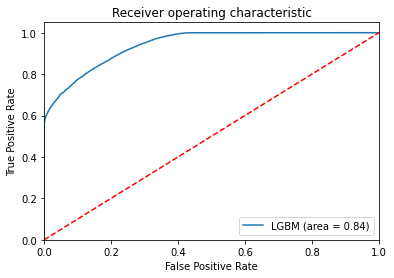

In [172]:
lgbm_roc_auc = roc_auc_score(y_test, y_pred_gbm)
fpr, tpr, thresholds = roc_curve(y_test, gbm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='LGBM (area = %0.2f)' % lgbm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('LGBM_ROC')
plt.show()